# Df 0 1 1_ R O O T Data Source
This tutorial illustrates how use the RDataFrame in combination with a
RDataSource. In this case we use a RRootDS. This data source allows to read
a ROOT dataset from a RDataFrame in a different way, not based on the
regular RDataFrame code. This allows to perform all sorts of consistency
checks and illustrate the usage of the RDataSource in a didactic context.




**Author:** Danilo Piparo  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:03 AM.</small></i>

In [1]:
using TDS = ROOT::RDF::RDataSource;

 A helper function is created: 

In [2]:
%%cpp -d
void fill_tree(const char *treeName, const char *fileName)
{
   ROOT::RDataFrame d(10000);
   auto i = 0.;
   d.Define("b1", [&i]() { return i++; }).Snapshot(treeName, fileName);
}

In [3]:
auto fileName = "df011_ROOTDataSources.root";
auto treeName = "myTree";
fill_tree(treeName, fileName);

auto d_s = ROOT::RDF::MakeRootDataFrame(treeName, fileName);

/ now we have a regular rdataframe: the ingestion of data is delegated to
/ the RDataSource. At this point everything works as before.

In [4]:
auto h_s = d_s.Define("x", "1./(b1 + 1.)").Histo1D({"h_s", "h_s", 128, 0, .6}, "x");

/ now we redo the same with a rdf and we draw the two histograms

In [5]:
ROOT::RDataFrame d(treeName, fileName);
auto h = d.Define("x", "1./(b1 + 1.)").Histo1D({"h", "h", 128, 0, .6}, "x");

auto c_s = new TCanvas();
c_s->SetLogy();
h_s->DrawClone();

auto c = new TCanvas();
c->SetLogy();
h->DrawClone();

return 0;

Draw all canvases 

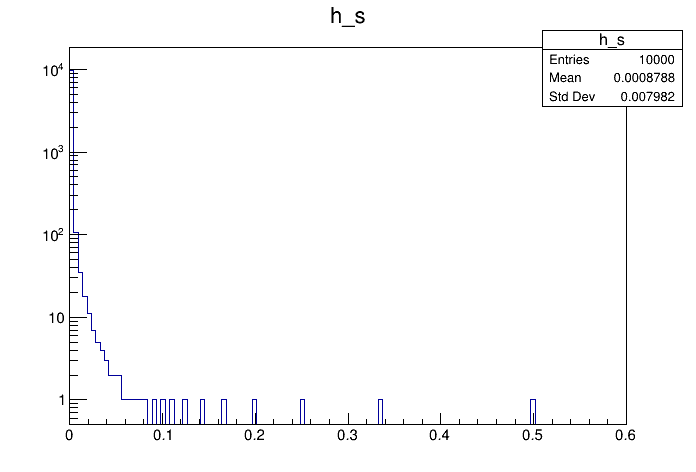

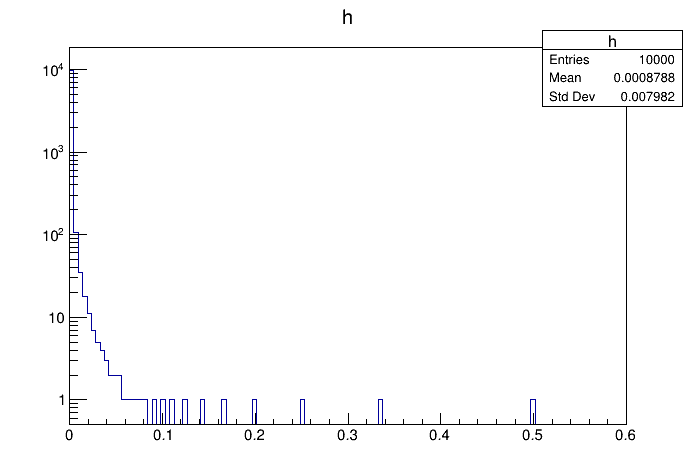

In [6]:
gROOT->GetListOfCanvases()->Draw()